# Max-Cut Sample


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=True,alpha=0.6,node_size=300,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

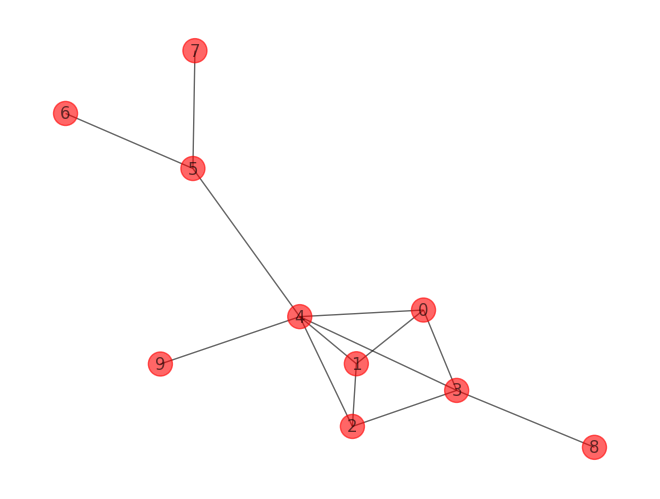

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/10-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  10 nodes, density:  0.28888888888888886


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
cut = dnx.maximum_cut(G, exactsolver)
cut

{1, 3, 4, 6, 7}

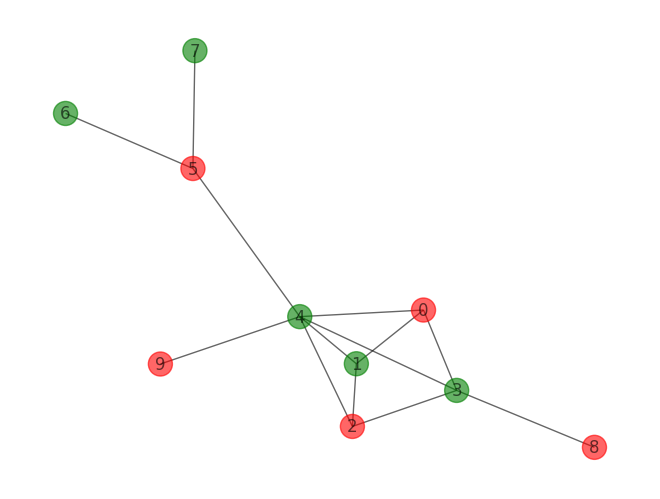

In [7]:
draw_graph(G,cut,pos)

In [8]:
print('cut-size: ',cut_size(G,cut))

cut-size:  11


## Quantum Solver

In [9]:
from dwave.system import DWaveSampler, EmbeddingComposite

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' dwave'

sampler = EmbeddingComposite(DWaveSampler())
cut = dnx.maximum_cut(G, sampler,label=label,num_reads=100)

In [10]:
cut

{1, 3, 5, 9}

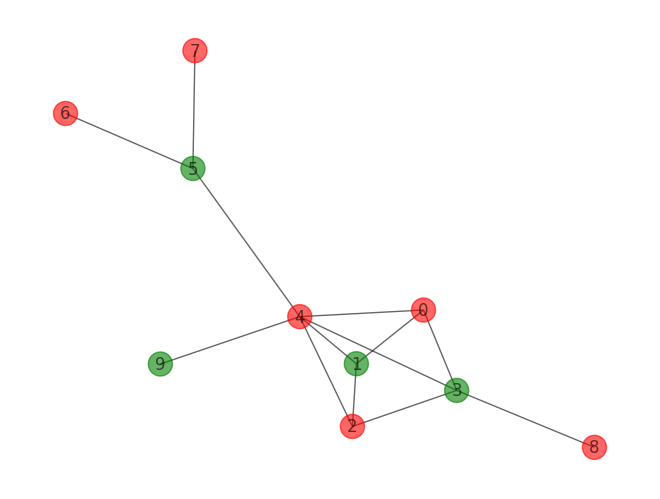

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  11
